<a href="https://colab.research.google.com/github/Samrat-Doi/Samrat-Doi/blob/main/Pima_indian_Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima-india-Diabetes Dataset

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
names = names = ['pregnency', 'plasma', 'BP','skin','test','BMI','pedigree','age','class']
df = pd.read_csv('pima-indians-diabetes.csv', names = names)
df.head(10)

,pregnency,plasma,BP,skin,test,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.tail(10)

,pregnency,plasma,BP,skin,test,BMI,pedigree,age,class
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnency  768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   BP         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   test       768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
pregnency,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
class_count = df.groupby('class').size()
class_count

class
0    500
1    268
dtype: int64

#Data Visualization

In [ ]:
# Univariate plots

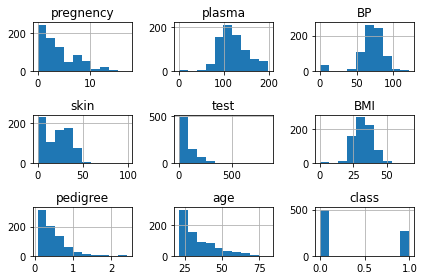

In [ ]:
#Histogram

df.hist()
plt.tight_layout()
plt.show()

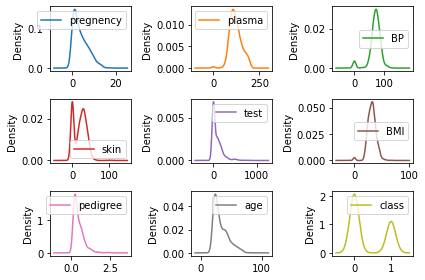

In [ ]:
#Density plot to see curves properly

df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout()
plt.show()

In [ ]:
#checking skew of attributes

skew = df.skew()
skew

pregnency    0.901674
plasma       0.173754
BP          -1.843608
skin         0.109372
test         2.272251
BMI         -0.428982
pedigree     1.919911
age          1.129597
class        0.635017
dtype: float64

# Visualization

<AxesSubplot:ylabel='class'>

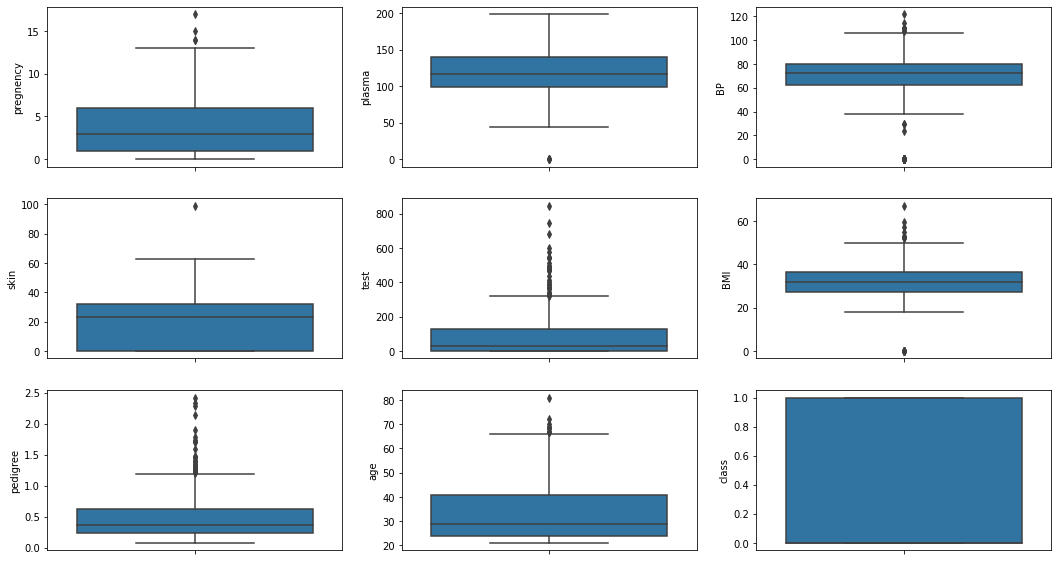

In [ ]:
#Box and whisker plot to check outliers

fig, axes = plt.subplots(3,3, figsize = (18,10))

sns.boxplot(ax = axes[0,0], y= 'pregnency', data =df)
sns.boxplot(ax = axes[0,1], y = 'plasma', data = df)
sns.boxplot(ax= axes[0,2], y = 'BP', data = df)
sns.boxplot(ax= axes[1,0], y = 'skin', data = df)
sns.boxplot(ax= axes[1,1], y = 'test', data = df)
sns.boxplot(ax= axes[1,2], y = 'BMI', data = df)
sns.boxplot(ax= axes[2,0], y = 'pedigree', data = df)
sns.boxplot(ax= axes[2,1], y = 'age', data = df)
sns.boxplot(ax= axes[2,2], y = 'class', data = df)

In [ ]:
# Multivariate plots

In [ ]:
#checking correaltion in attributes
# Correlation matrix, (Pearson's Coefficient(r))

pd.set_option('display.width', 100)
pd.set_option('precision', 5)
correlations = df.corr(method = 'pearson')
print(correlations)

           pregnency   plasma       BP     skin     test      BMI  pedigree      age    class
pregnency    1.00000  0.12946  0.14128 -0.08167 -0.07353  0.01768  -0.03352  0.54434  0.22190
plasma       0.12946  1.00000  0.15259  0.05733  0.33136  0.22107   0.13734  0.26351  0.46658
BP           0.14128  0.15259  1.00000  0.20737  0.08893  0.28181   0.04126  0.23953  0.06507
skin        -0.08167  0.05733  0.20737  1.00000  0.43678  0.39257   0.18393 -0.11397  0.07475
test        -0.07353  0.33136  0.08893  0.43678  1.00000  0.19786   0.18507 -0.04216  0.13055
BMI          0.01768  0.22107  0.28181  0.39257  0.19786  1.00000   0.14065  0.03624  0.29269
pedigree    -0.03352  0.13734  0.04126  0.18393  0.18507  0.14065   1.00000  0.03356  0.17384
age          0.54434  0.26351  0.23953 -0.11397 -0.04216  0.03624   0.03356  1.00000  0.23836
class        0.22190  0.46658  0.06507  0.07475  0.13055  0.29269   0.17384  0.23836  1.00000


<AxesSubplot:>

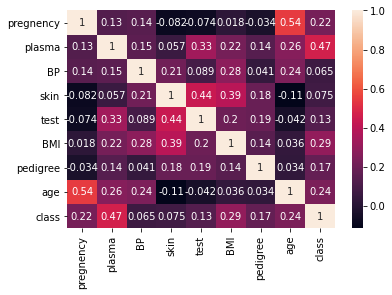

In [ ]:
#heatmap with annotations to check correlation

sns.heatmap(df.corr(), annot = True)

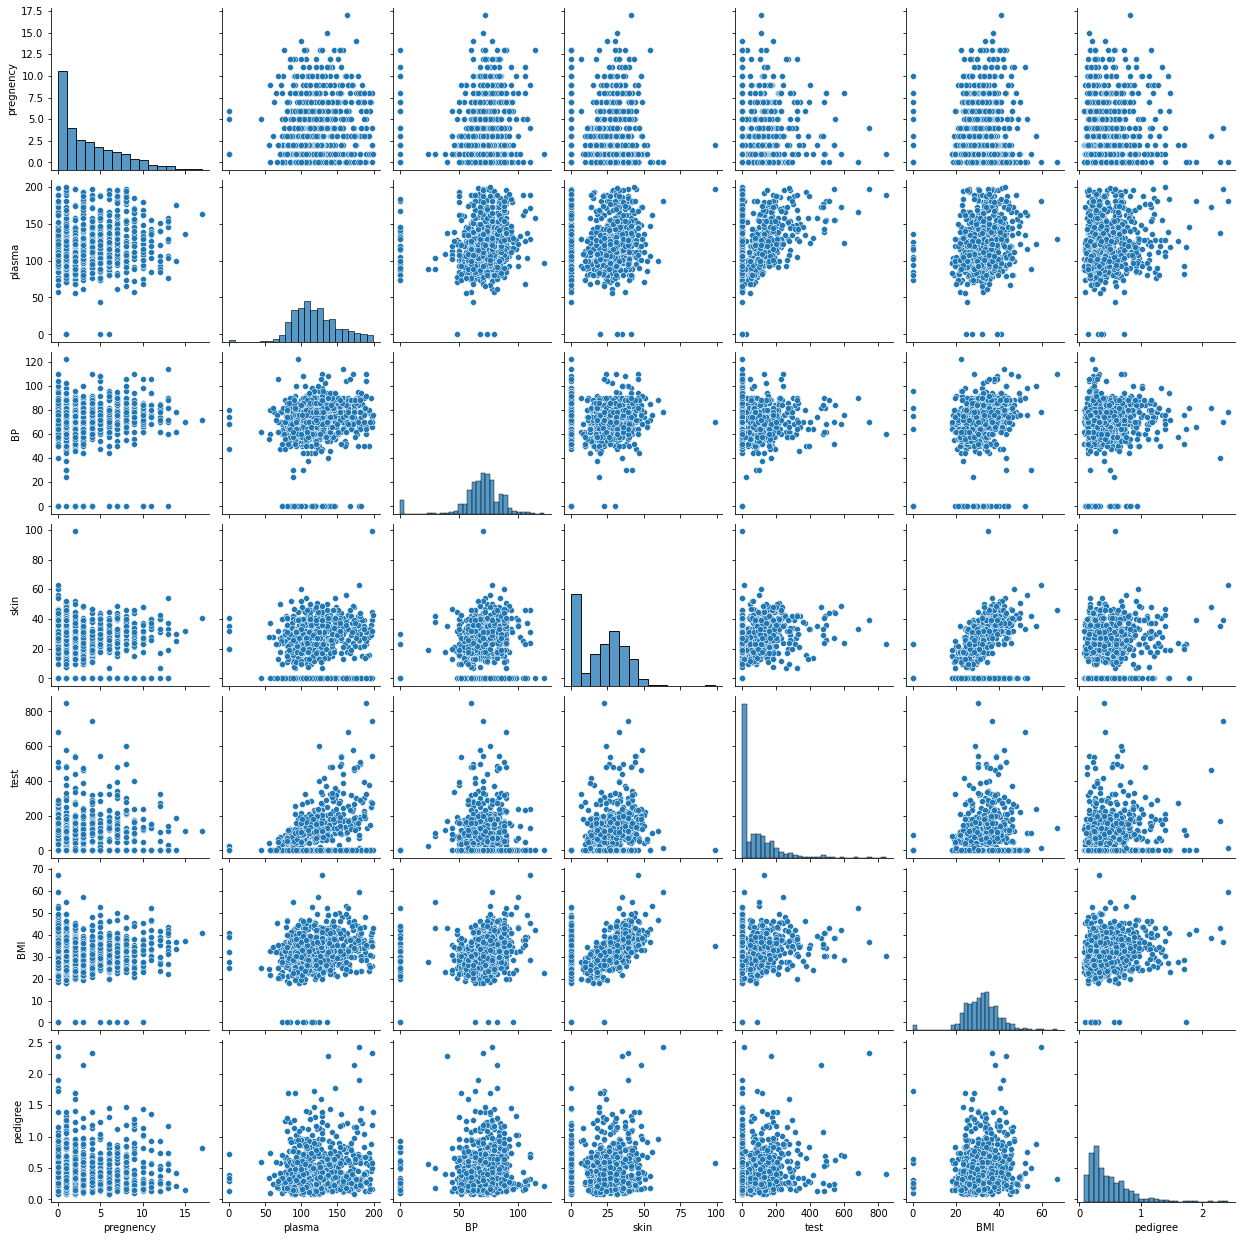

In [ ]:
#pairplot

df1 = df.iloc[:,:7]
sns.pairplot(df1)

# Preprocessing

In [ ]:
#standardize data (0 mean, 1 std)

from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array = df.values

#separate array into input and output components

a = array[:,0:-1]
Y = array[:,-1]

scaler = StandardScaler().fit(a)
#scaler = MinMaxScaler().fit(a)
#scaler = Normalizer().fit(a)
X = scaler.transform(a)

#summarize the data

set_printoptions(precision = 3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


# Train test split

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X , Y , test_size = 0.4 , random_state = 1)

# Model Implementation

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)
score = model.score(X_test, y_test)
accuracies = cross_val_score(estimator = model, X = X_test, y = y_test, cv =5)
print(("Accuracy: %.3f%% ") % (accuracies.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(mean_absolute_error(y_test,predict))
print(mean_squared_error(y_test,predict))
print(np.sqrt(mean_squared_error(y_test,predict)))

Accuracy: 76.277% 
Standard Deviation: 4.31 %
0.237012987012987
0.237012987012987
0.48683979604484573


In [ ]:
model1 = KNeighborsClassifier(n_neighbors = 40)
model1.fit(X_train,y_train)
predict1 = model1.predict(X_test)
score1 = model1.score(X_test, y_test)
accuracies1 = cross_val_score(estimator = model1, X = X_test, y = y_test, cv = 4)
print(("Accuracy: %.3f%% ") % (accuracies1.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print(mean_absolute_error(y_test,predict1))
print(mean_squared_error(y_test,predict1))
print(np.sqrt(mean_squared_error(y_test,predict1)))

Accuracy: 73.052% 
Standard Deviation: 5.23 %
0.22402597402597402
0.22402597402597402
0.4733138219257642


In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
predict2 = model2.predict(X_test)
score2 = model2.score(X_test, y_test)
accuracies2 = cross_val_score(estimator = model2, X = X_test, y = y_test, cv = 5)
print(("Accuracy: %.3f%% ") % (accuracies2.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))
print(mean_absolute_error(y_test,predict2))
print(mean_squared_error(y_test,predict2))
print(np.sqrt(mean_squared_error(y_test,predict2)))

Accuracy: 76.928% 
Standard Deviation: 6.55 %
0.237012987012987
0.237012987012987
0.48683979604484573


In [ ]:
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
predict3 = model3.predict(X_test)
score3 = model3.score(X_test, y_test)
accuracies3 = cross_val_score(estimator = model3, X = X_test, y = y_test, cv = 3)
print(("Accuracy: %.3f%% ") % (accuracies3.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print(mean_absolute_error(y_test,predict3))
print(mean_squared_error(y_test,predict3))
print(np.sqrt(mean_squared_error(y_test,predict3)))

Accuracy: 70.439% 
Standard Deviation: 3.45 %
0.30844155844155846
0.30844155844155846
0.5553751510839844
